# Logistic Regression 
#### Rick Gosalvez, 2021 Data Mining

# Theory

## 1.Logistic Regression Result Analysis

### 1a. Statistically significant features @ 90% confidence level

If P value < 0.10 then cannot accept Ho, therefore it is important!
(Said differently, if large > eliminate)
* Ho: ai  = 0 (no impact to outcome class)
* H1: ai != 0 (important)

In [1]:
import pandas as pd
import numpy as np

df = {'index':  ['x1','x2','x3','x4','x5','x6','x7'],
      'Coef':   [0.2697623,-0.2500592,0.1150445,0.3649722,-0.3131214,-0.1361499,3.206987],
      'St. Err':[0.1759677,0.1459846,0.1486181,0.153434,0.1467796,0.1566993,0.3631481],
      'z':      [1.53,01.71,0.77,2.38,-2.13,-0.87,8.83],
      'Pz':     [0.125,0.087,0.439,0.017,0.033,0.385,0]
     }

df = pd.DataFrame(df)

df.loc[df['Pz'] <= 0.10, 'Test'] = '<< cannot accept Ho'
df.loc[df['Pz'] > 0.10, 'Test']  = '-'
df

,index,Coef,St. Err,z,Pz,Test
0,x1,0.269762,0.175968,1.53,0.125,-
1,x2,-0.250059,0.145985,1.71,0.087,<< cannot accept Ho
2,x3,0.115044,0.148618,0.77,0.439,-
3,x4,0.364972,0.153434,2.38,0.017,<< cannot accept Ho
4,x5,-0.313121,0.146780,-2.13,0.033,<< cannot accept Ho
5,x6,-0.136150,0.156699,-0.87,0.385,-
6,x7,3.206987,0.363148,8.83,0.000,<< cannot accept Ho


In [2]:
sum = df['Coef'].sum()
sum

3.2574354999999997

### 1b. Meaning of negative coefficients

Negative coefficients (x2, x5, x6) have a negative (inverse) relationship with probability per unit increase.
* x2 per unit increase, log(odds) decreases by -0.250059, which also decreases the probability (see below)
* x3 per unit increase, log(odds) decreases by -0.313121, which also decreases the probability (see below)
* x4 per unit increase, log(odds) decreases by -0.136150, which also decreases the probability (see below)

$$Probability:\ = \frac{odds}{1\:+\:odds}\:=\:\frac{e^{(a_0+a_1x_1...)}}{{1\:+\:e^{(a_0+a_1x_1...)}}}$$

In [3]:
import math

x2 = -0.250059
x5 = -0.313121
x6 = -0.136150

P2_1 = math.e**(x2*1) / (1 + math.e**(x2*1))
P2_2 = math.e**(x2*2) / (1 + math.e**(x2*2))
P5_1 = math.e**(x5*1) / (1 + math.e**(x5*1))
P5_2 = math.e**(x5*2) / (1 + math.e**(x5*2))
P6_1 = math.e**(x6*1) / (1 + math.e**(x6*1))
P6_2 = math.e**(x6*2) / (1 + math.e**(x6*2))

print(f'Probability for x2 with 1 unit increase: P@1 = {P2_1:.4f} vs. P@2 =  {P2_2:.4f}')
print(f'Probability for x3 with 1 unit increase: P@1 = {P5_1:.4f} vs. P@2 =  {P5_2:.4f}')
print(f'Probability for x4 with 1 unit increase: P@1 = {P6_1:.4f} vs. P@2 =  {P6_2:.4f}')

Probability for x2 with 1 unit increase: P@1 = 0.4378 vs. P@2 =  0.3775
Probability for x3 with 1 unit increase: P@1 = 0.4224 vs. P@2 =  0.3484
Probability for x4 with 1 unit increase: P@1 = 0.4660 vs. P@2 =  0.4323


### 1c. Calc Odds Ratio (OR) for unit = 1

$$Odds\:Ratio\:(OR)\ = \frac{e^{a_0+a_1(x_1+1)}}{e^{a_0+a_1x_1}} \:=\:{e^{a_1}}$$

a0 = intercept; assume intercept @ origin (e.g. no ao intercept in table)

In [4]:
print('Odds Ratio (OR)')
l = 1

for i in range(len(df)):
    x = df.Coef[i]
    print(f' x{l} = e^{x:.4f} = {math.e**x:.4f}')
    l +=1

Odds Ratio (OR)
 x1 = e^0.2698 = 1.3097
 x2 = e^-0.2501 = 0.7788
 x3 = e^0.1150 = 1.1219
 x4 = e^0.3650 = 1.4405
 x5 = e^-0.3131 = 0.7312
 x6 = e^-0.1361 = 0.8727
 x7 = e^3.2070 = 24.7045


### 1d. Increase x1 +5 units; calc odds for class = 1

new odds (per unit increase) = e^(ai*x) * baseline

In [5]:
x1 = math.e**0.2697623      # baseline, or odds of unit=1 score for class=1
xn = x1**5                  # adding +5 unit score e^(ai^x) * baseline

print(f'x1 baseline odds       = {x1:.4f} is a positive relationship')
print(f'x1 +5 units odds ratio = {xn:.4f}')

x1 baseline odds       = 1.3097 is a positive relationship
x1 +5 units odds ratio = 3.8528


### 1e. For x4(unit=1), when x4=1, odds are 0.25; calculate the probablity of class=1. 

$$P\ = \frac{odds}{1+odds}$$

In [6]:
# x4 coef. has a positive relationship, probability should increase with unit increase
baseline_odds        = 0.25          
baseline_probability = baseline_odds / (1 + baseline_odds)
print(f'Probability (class=1) = {baseline_probability}')

Probability (class=1) = 0.2


### Calculate the probability of class=1 if x4=5 (an increase of 4 units).

In [7]:
# set index for field look-up
df.set_index('index', inplace = True) 

In [8]:
new_odds = (math.e**((df.loc['x4']['Coef'])*4))*baseline_odds
new_odds

1.0763701830668024

In [9]:
Pnewt = new_odds / (1 + new_odds)
print(f'Probability (class=1) = {Pnewt:.4f} if increased by 4 units b/c of positive relationship (OR >1)')

Probability (class=1) = 0.5184 if increased by 4 units b/c of positive relationship (OR >1)


# Practice

In [10]:
import numpy as np
import pandas as pd
import pandas.testing as tm
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler       # Standardization of data
from sklearn.preprocessing import LabelEncoder         # Label > Number for analysis

from sklearn.metrics import plot_confusion_matrix      # pretty plot confusion matrix
from sklearn.model_selection import train_test_split   # Training/Test split

from sklearn.linear_model import LogisticRegression    # Logistic regression
import statsmodels.api as sm                           # Step model

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve 

#### 1. Load and check data

In [11]:
# create variable to load dataset into Panda framework and print table to python
df  = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 2. Split data into 'input' and 'output'

In [12]:
# X = Input feature (10 features: Age, Experience, Income, Family, CCAvg, Education, Mortgage, SecuritiesAccount, CDAccount, CreditCard)
X = df.drop(['ID','ZIPCode','PersonalLoan','Online'], axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0
1,45,19,34,3,1.5,1,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,1


In [13]:
X.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000


In [14]:
# y = Outcome (1 feature - PersonalLoan)
y = df['PersonalLoan']
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# normalize all non-binary features (e.g. only SecuritiesAccount, CDAccount, and CreditCard are binary)
# however left Mortgage per instructor's request/requirement > does not affect model accuracy

stdsc = StandardScaler()
X.iloc[:,[0,1,2,3,4,5]] = stdsc.fit_transform(X.iloc[:,[0,1,2,3,4,5]])
#X['Intercept'] = 1     # if set intercept before, removes warning, but not recommended, changes logistic regression!!!
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,0,1,0,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,0,1,0,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,0,0,0,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,0,0,0,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,0,0,0,1


#### 3. Split data into training and test datasets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
# logistic = LogisticRegression(solver='liblinear') # good for smaller datasets, avoids warnings
logistic = LogisticRegression()     # 'lbfgs' is default optimizer, but throws iterations warning
logistic.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logistic.predict(X_test) 

In [19]:
print(f'Model Accuracy Score: {accuracy_score(y_test,y_pred)}')

Model Accuracy Score: 0.947


#### 4. Draw confusion matrix

In [20]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index  =['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],891,11
True[1],42,56


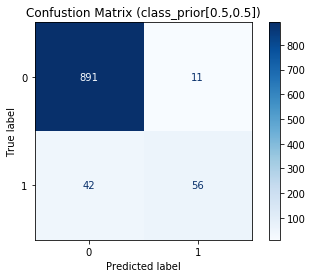

In [21]:
plot_confusion_matrix(logistic, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confustion Matrix (class_prior[0.5,0.5])')
plt.show()

#### 5. Draw ROC Curve and cumulative gain chart

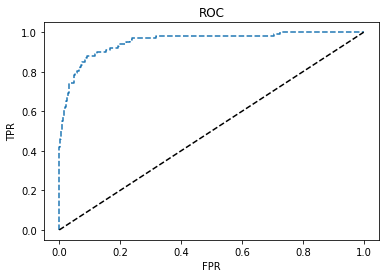

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0,1],[0,1],'k--', label='Random Guess')
plt.plot([fpr],[tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

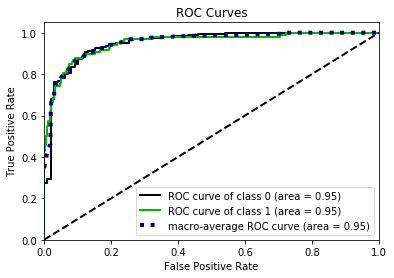

In [23]:
skplt.metrics.plot_roc(y_test, logistic.predict_proba(X_test), plot_micro=False)
plt.show()

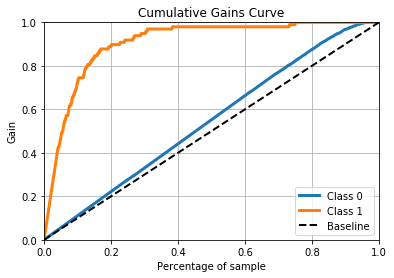

In [24]:
skplt.metrics.plot_cumulative_gain(y_test, logistic.predict_proba(X_test))
plt.show()

#### 6. Use sm.logit with "intercept=1" to check coefficients

In [25]:
# Set intercept after split, can cause warnings but recommended vs adding prior to split (step 2)
X_train['Intercept'] = 1                   

In [26]:
# Option 2: Split and use training dataset; can confirm by matching Feature Selection of test/train.
# Prof. recommends using X_train for Hw5 per email on 031621
logistic_ml   = sm.Logit(y_train, X_train)

In [27]:
logistic_coef = logistic_ml.fit()
logistic_coef.summary2()

Optimization terminated successfully.
         Current function value: 0.128942
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                Logit            Pseudo R-squared: 0.591    
Dependent Variable:   y                AIC:              1053.5329
Date:                 2021-05-11 17:32 BIC:              1122.7675
No. Observations:     4000             Log-Likelihood:   -515.77  
Df Model:             10               LL-Null:          -1260.3  
Df Residuals:         3989             LLR p-value:      0.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       9.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age               -0.5726   0.7829  -0.7314 0.4645 -2.1070  0.9618
Experience         0.7104   0.7800   0.9108 0.3624 -0.8183  2.2391
Income             2.4826   0.1339  18.5355 0.0000  2.2200  2.7451
Family             0.7573   0.0937   8.0835 0.0000  0.5737  0.9410
CCAvg              0.2306   0.0774   2.9780 0.0029  0.0788  0.3823
Education          1.4370   0.1069  13.4376 0.0000  1.2274  1.6466
Mortgage           0.0008   0.0006   1.2614 0.2072 -0.0004  0.0020
SecuritiesAccount -1.0027   0.3307  -3.0319 0.0024 -1.6509 -0.3545
CDAccount          3.3350   0.3429   9.7258 0.0000  2.6629  4.0071
CreditCard        -0.9569   0.2234  -4.2837 0.0000 -1.3948 -0.5191
Intercept         -4.5171   0.1883 -23.9865 0.0000 -4.8862 -4.1480
==================================================================

"""

#### 7. Calculate Odds Ratio (OR) for each input feature for unit change=1

In [28]:
np.exp(logistic_coef.params)

Age                   0.564059
Experience            2.034849
Income               11.971815
Family                2.132588
CCAvg                 1.259293
Education             4.208133
Mortgage              1.000780
SecuritiesAccount     0.366881
CDAccount            28.079066
CreditCard            0.384068
Intercept             0.010920
dtype: float64

<div class="alert alert-block alert-warning">
    <b>Observation:</b> <br><u>By not setting parameters in split or normalizer</u>, P-value for <b>CCAvg</b> fluctuates. Sometimes, it's above P < 0.01 and sometimes below, resulting in either 6 or 7 features to be selected. When:
<br>- above P-value (not important), model accuracy is higher before and after feature selection; 1 less feature selection (CCAvg).
<br>- below P-value (important), model accuracy is lower before and after feature selection; 1 more feature selection (CCAvg).
<br> Model accuracy variance is ~2%.
    <br>
    <br>
Originally, setting intercept after split caused warnings, but did not affect results. To fix this I set the intercept before the split and results were the same; however, Prof. says that the intercept should be set after the split. 
    <br>
    Asking why - if intercept before or after split and results were the same, why does it matter?
</div>

#### 8. Choose input features based on 99% confidence level (P < 0.01); redo classification via LogisticRegression in sckitlearn with same parameter set from #3; use same test data; draw confusion matrix.

Upon visual inspection; the following are 7 features are <b>statistically significant</b>, plus the intercept:
* Income
* Family
* CCAvg
* Eduction
* SecuritiesAccount
* CDAccount
* CreditCard
* Intercept (<i>not a feature</i>)

#### 8(2). Split data into 'input' and 'output'

In [29]:
# X = Input feature (features: Income, Family, Education, CDAccount, CreditCard)
X = df.drop(['ID','Age','Experience','ZIPCode','Mortgage','PersonalLoan','Online'], axis=1)
X.head()

,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,CreditCard
0,49,4,1.6,1,1,0,0
1,34,3,1.5,1,1,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,1


In [30]:
X.describe()

,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,73.774200,2.396400,1.937938,1.881000,0.104400,0.06040,0.294000
std,46.033729,1.147663,1.747659,0.839869,0.305809,0.23825,0.455637
min,8.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,39.000000,1.000000,0.700000,1.000000,0.000000,0.00000,0.000000
50%,64.000000,2.000000,1.500000,2.000000,0.000000,0.00000,0.000000
75%,98.000000,3.000000,2.500000,3.000000,0.000000,0.00000,1.000000
max,224.000000,4.000000,10.000000,3.000000,1.000000,1.00000,1.000000


In [31]:
# y = Outcome (1 feature - PersonalLoan)
y = df['PersonalLoan']
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# standardize non-binary values
stdsc = StandardScaler()
X.iloc[:,[0,1,2,3]] = stdsc.fit_transform(X.iloc[:,[0,1,2,3]])  
X.head()

,Income,Family,CCAvg,Education,SecuritiesAccount,CDAccount,CreditCard
0,-0.538229,1.397414,-0.193385,-1.049078,1,0,0
1,-0.864109,0.525991,-0.250611,-1.049078,1,0,0
2,-1.363793,-1.216855,-0.536736,-1.049078,0,0,0
3,0.569765,-1.216855,0.436091,0.141703,0,0,0
4,-0.625130,1.397414,-0.536736,0.141703,0,0,1


#### 8(3). Split data into training and test datasets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = logistic.predict(X_test)

In [36]:
print(f'Model Accuracy Score: {accuracy_score(y_test,y_pred)}')

Model Accuracy Score: 0.949


#### 8(4). Draw confusion matrix

In [37]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index  =['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],894,10
True[1],41,55


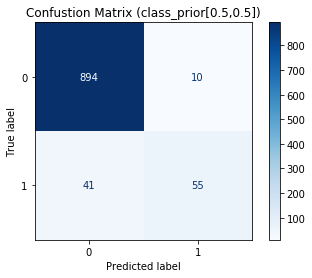

In [38]:
plot_confusion_matrix(logistic, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confustion Matrix (class_prior[0.5,0.5])')
plt.show()

#### 8(5). Draw ROC Curve and cumulative gain chart

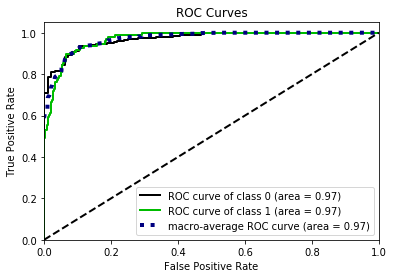

In [39]:
skplt.metrics.plot_roc(y_test, logistic.predict_proba(X_test), plot_micro=False)
plt.show()

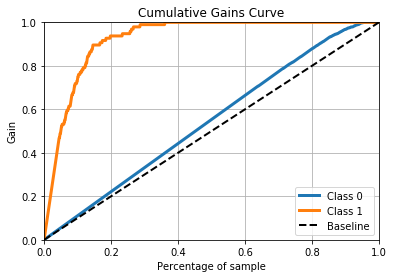

In [40]:
skplt.metrics.plot_cumulative_gain(y_test, logistic.predict_proba(X_test))
plt.show()

#### 8(6). Use sm.logit with "intercept=1" to check coefficients

In [41]:
X['Intercept'] = 1  # added prior to split in step 8(2)

In [42]:
# Option 1: use full dataset, better to use split data! - do not do for HW5
# logistic_ml   = sm.Logit(y, X)

In [43]:
# Option 2: training dataset, BETTER! - do for HW5 per email on 031621
logistic_ml   = sm.Logit(y_train, X_train)

In [44]:
logistic_coef = logistic_ml.fit()
logistic_coef.summary2()

Optimization terminated successfully.
         Current function value: 0.462557
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                Logit            Pseudo R-squared: -0.463   
Dependent Variable:   y                AIC:              3714.4583
Date:                 2021-05-11 17:32 BIC:              3758.5166
No. Observations:     4000             Log-Likelihood:   -1850.2  
Df Model:             6                LL-Null:          -1264.8  
Df Residuals:         3993             LLR p-value:      1.0000   
Converged:            1.0000           Scale:            1.0000   
No. Iterations:       7.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Income             0.8205   0.0561  14.6339 0.0000  0.7106  0.9304
Family             0.2413   0.0413   5.8483 0.0000  0.1605  0.3222
CCAvg              0.1055   0.0525   2.0087 0.0446  0.0026  0.2084
Education          0.3738   0.0421   8.8787 0.0000  0.2913  0.4564
SecuritiesAccount -2.9679   0.2180 -13.6144 0.0000 -3.3952 -2.5406
CDAccount          3.1761   0.2419  13.1288 0.0000  2.7019  3.6502
CreditCard        -3.2989   0.1567 -21.0529 0.0000 -3.6060 -2.9917
==================================================================

"""

#### 8(7). Calculate Odds Ratio (OR) for each input feature for unit change=1

In [45]:
np.exp(logistic_coef.params)

Income                2.271553
Family                1.272966
CCAvg                 1.111233
Education             1.453304
SecuritiesAccount     0.051411
CDAccount            23.952411
CreditCard            0.036925
dtype: float64

Feature selection to remove 'irrelvant features' slightly affects accuracy and coefficients; however, with a large set of data, feature selection could save significant processing time and energy in exchange for a slight accuracy hit.